Implementing LogisticsRegression in Python


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mydata=pd.read_excel(r'C:\Users\HP\Desktop\csv-files\classification.xlsx')

In [3]:
mydata

,customer_age,customer_loan_amount,loan_status
0,31,1000,1
1,29,1200,1
2,56,800,1
3,45,1300,1
4,34,5600,0
5,67,700,0
6,54,900,0
7,39,2300,0
8,64,9800,0
9,30,6500,0


In [4]:
#Loading machine learning library from skleran
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
#seperating train and test data
independent_variables=['customer_age','customer_loan_amount']
X=mydata[independent_variables]    # independent variable
y=mydata['loan_status']            # dependent variable

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40)
print('train:',len(X_train),'test:',len(X_test))

train: 12 test: 8


Training The Classification Model

In [6]:
#instantiate a Logistic regression model,and fit with X and y
model=LogisticRegression()
model=model.fit(X_train,y_train)

#check the accuracy on the training set
model.score(X_train,y_train)


0.5

Evaluating the model

In [7]:
#predict will give the predicted result for test set
print(model.predict(X_test))

[0 1 1 1 1 0 1 1]


In [11]:
#generate evaluation metrics
from sklearn import metrics
print("Accuracy ON TEST SET:",metrics.accuracy_score(y_test,model.predict(X_test)))


Accuracy ON TEST SET: 0.625


In [9]:
print("Confusion matrix:",metrics.confusion_matrix(y_test,model.predict(X_test)))

Confusion matrix: [[2 3]
 [0 3]]


ROC AUC: 0.80


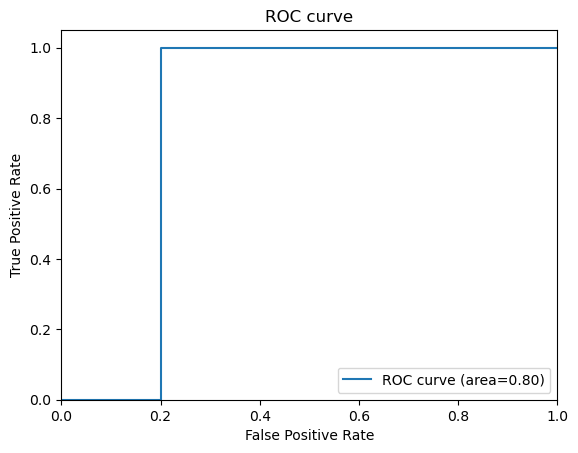

In [10]:
#ROC curve
#Determine the false positive and true positive rates
fpr,tpr, _=metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1])

#calculate the AUC
roc_auc=metrics.auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)

#plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % roc_auc)
#plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()